In [1]:
# ME17B158 - Omkar Nath

# Encoding (Label encoding and One-hot encoding)


These are simple exercises useful for notebook 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import warnings

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [3]:
grades_data = pd.read_csv("grades.csv")

In [4]:
grades_data.head()

,Name,Grades
0,Nilesh,A
1,Jhon,S
2,James,C
3,Ravi,F
4,Sita,S


In [5]:
print(np.sort(grades_data.Grades.unique()))

['A' 'B' 'C' 'E' 'F' 'S']


In [6]:
# write a function to do Label encoding
def label_encoding(df, column):
    df.loc[df[column]=='F',column] = 0
    df.loc[df[column]=='E',column] = 4
    df.loc[df[column]=='C',column] = 7
    df.loc[df[column]=='B',column] = 8
    df.loc[df[column]=='A',column] = 9
    df.loc[df[column]=='S',column] = 10
    return df

In [7]:
grades_data = label_encoding(grades_data, "Grades")

In [8]:
grades_data.head()

,Name,Grades
0,Nilesh,9
1,Jhon,10
2,James,7
3,Ravi,0
4,Sita,10


Answer the following for both the data 

- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?


Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


- The Categories in the Grades Data are: S, A, B, C, E, F
- Taking IITM Grading System, we have: S=10, A=9. B=8, C=7, E=4, F=0
- As there is a clear hierarchy to the categories, Label Encoding is to be used

Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

In [9]:
color_data = pd.read_csv("color.csv")

In [10]:
color_data.head()

,Objects,Color
0,Leaves,Green
1,Blood,Red
2,Sea,Blue
3,Rose,Red
4,Sun flower,Yellow


In [11]:
colors = color_data.Color.unique()
print(colors)

['Green' 'Red' 'Blue' 'Yellow']


Hint : you can achieve using pandas (no need for sklearn) check the documentation

In [12]:
# Answer
m = color_data.shape[0]

for color in colors:
    color_data[color] = np.zeros(m)
    
for color in colors:
    color_data.loc[color_data.Color == color, color] = 1
    
color_data = color_data.drop(columns = ["Color"])

In [13]:
color_data.head()

,Objects,Green,Red,Blue,Yellow
0,Leaves,1.0,0.0,0.0,0.0
1,Blood,0.0,1.0,0.0,0.0
2,Sea,0.0,0.0,1.0,0.0
3,Rose,0.0,1.0,0.0,0.0
4,Sun flower,0.0,0.0,0.0,1.0


Answer the following for both the data 

- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?

- There are four categories of colors, Red, Blue, Green and Yellow
- There is no relationship between the colors
- Therefore one-hot encoding should be used

# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [14]:
def computeCost(X, y, theta,lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    
    J = np.mean(np.square(np.dot(X,theta)-y))/2 + lamda*np.sum(np.square(theta))
    
    return J

In [15]:
def gradientDescent(X_appended, y, theta, alpha, lamda=10,max_iters= 1000):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Initialize some useful values
    
    J_history = []
    m = X_appended.shape[0]
        
    for i in range(max_iters):
        theta = theta - alpha/m * (np.dot(X_appended.T,(np.dot(X_appended,theta)-y)) + lamda*theta)
        cost = computeCost(X_appended, y, theta, lamda)
        J_history.append(cost)
    
    return theta, J_history

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [16]:
X_train_data = np.load("dataWeek4Train.npz")["X_train"]
y_train = np.load("dataWeek4Train.npz")["y_train"].reshape(-1,1)
X_test_data = np.load("dataWeek4Test.npz")["X_test"]
y_test = np.load("dataWeek4Test.npz")["y_test"].reshape(-1,1)

In [17]:
m = X_train_data.shape[0]
m_test = X_test_data.shape[0]
X_train = np.c_[np.ones(m), X_train_data, np.square(X_train_data), X_train_data**3]
X_test = np.c_[np.ones(m_test), X_test_data, X_test_data**2, X_test_data**3]

Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

Lamda =  0
Theta =  [0.90814099] [0.68871098] [1.00737143] [-0.01613571]


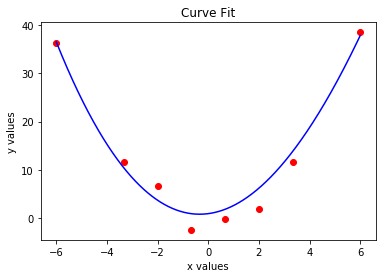

Lamda =  100
Theta =  [0.24840462] [0.10537678] [0.99613971] [0.00127674]


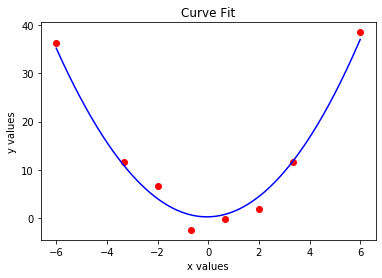

Lamda =  10000
Theta =  [0.00799908] [-0.00069241] [0.23195362] [0.00403168]


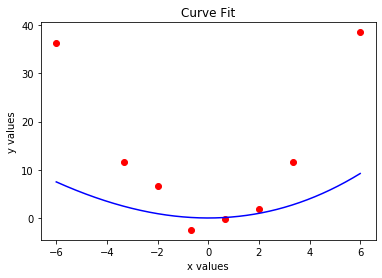

In [18]:
# Initialization
lamdas = [0,100,10000]
alpha = 0.0001
max_iters = 1000

train_mse = []
test_mse = []

theta = np.ones((4,1))

for lamda in lamdas:
    theta, J_history = gradientDescent(X_train, y_train, theta, alpha, lamda, max_iters)
    
    print("Lamda = ", lamda)
    print("Theta = ", *theta)
    
    # Plotting Fit of the Curve
    x_lin = np.linspace(min(X_train_data), max(X_train_data), 1000)
    x_uniform = np.c_[np.ones(x_lin.shape[0]), x_lin, x_lin**2, x_lin**3]
    
    plt.scatter(X_train_data, y_train, color = 'red')
    plt.plot(x_lin, np.dot(x_uniform, theta), color='blue')
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.title("Curve Fit")
    plt.show()
    
    train_mse.append(computeCost(X_train, y_train, theta, 0))
    test_mse.append(computeCost(X_test, y_test, theta, 0))

In [19]:
# As seen, with a larger lamda, underfitting occurs due to too large penalization on the parameters
# As lamda decreases, mse decreases.

Use same data "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models4

In the following exercises you can use inbuilt regressionn functions from sklearn

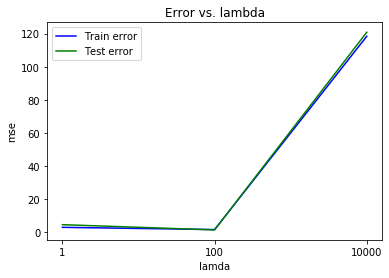

In [20]:
plt.plot(train_mse, color = 'blue', label='Train error')
plt.plot(test_mse, color = 'green', label='Test error')
plt.title("Error vs. lambda")
plt.xlabel("lamda")
plt.ylabel("mse")
plt.xticks([0, 1, 2], [1, 100, 10000])
plt.legend()
plt.show()

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

In [21]:
''' Import neccessay packages '''

def regression(X,y,reg_type ="ridge",degree = 9,alpha=0.1 ):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    X = X.reshape(-1, 1)
    
    model = PolynomialFeatures(degree)
    X_transformed = model.fit_transform(X)

    if reg_type == 'linear':
        regressor = LinearRegression()
    if reg_type == 'ridge':
        regressor = Ridge(alpha=alpha)
    if reg_type == 'lasso':
        regressor = Lasso(alpha=alpha)
        
    regressor.fit(X_transformed, y)
    y_pred = regressor.predict(X_transformed)

    mse = mean_squared_error(y, y_pred)
    print("For ",reg_type," regression, the Mean Squared Error is:", mse)

    x_lin = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    x_lin_transformed = model.fit_transform(x_lin)
    y_lin = regressor.predict(x_lin_transformed)
    
    plt.plot(x_lin, y_lin, color = 'blue')
    plt.scatter(X, y, color = 'red')
    plt.title(("Ploynomial of degree "+str(degree)+" using "+reg_type+" regression"))
    plt.xlabel("X values")
    plt.ylabel("y values")
    plt.show()

    Y_hat = y_pred
               
    return Y_hat, mse , regressor

In [22]:
#Loading Data
X_train_data = np.load("dataWeek4Train.npz")["X_train"]
y_train = np.load("dataWeek4Train.npz")["y_train"].reshape(-1,1)
X_test_data = np.load("dataWeek4Test.npz")["X_test"]
y_test = np.load("dataWeek4Test.npz")["y_test"].reshape(-1,1)

For  linear  regression, the Mean Squared Error is: 2.4207628426722186e-20


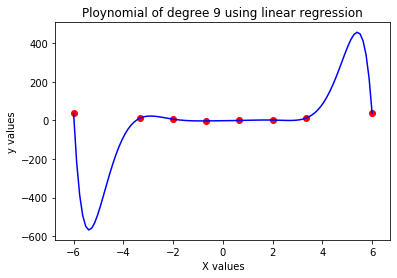

In [23]:
Y_hat, mse , reg = regression(X_train_data, y_train, reg_type ="linear", degree = 9)

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features

In [24]:
polynomial = PolynomialFeatures(9)
X_test_transformed = polynomial.fit_transform(X_test_data.reshape(-1, 1))

In [25]:
lamdas = [0, 1, 10**5, 10**10]

For  ridge  regression, the Mean Squared Error is: 1.7591204410350862e-09


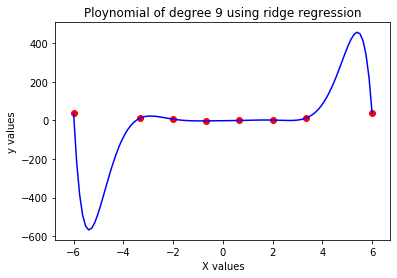

For  ridge  regression, the Mean Squared Error is: 0.08781531350917063


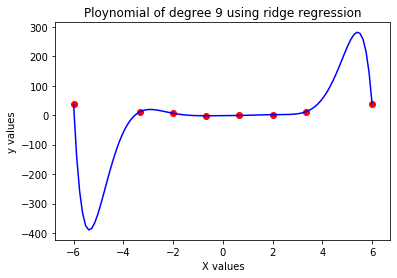

For  ridge  regression, the Mean Squared Error is: 4.876340595881948


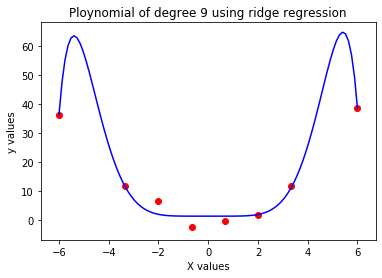

For  ridge  regression, the Mean Squared Error is: 22.052172303271576


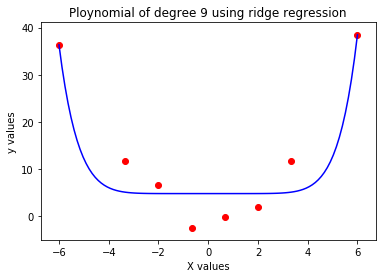

In [26]:
#Ridge Regression 

warnings.filterwarnings("ignore")

ridge_train_mse = []
ridge_coeffs = []
ridge_test_mse = []

for lamda in lamdas:
    Y_hat, mse , reg = regression(X_train_data, y_train, reg_type ="ridge", degree = 9, alpha=lamda)
    ridge_train_mse.append(mse)
    ridge_coeffs.append(reg.coef_.flatten())
    ridge_test_mse.append(mean_squared_error(y_test, reg.predict(X_test_transformed)))

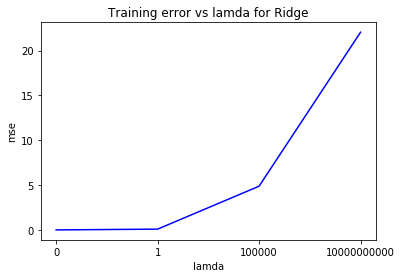

In [27]:
# Ridge Error
plt.plot(ridge_train_mse, color='blue')
plt.title("Training error vs lamda for Ridge")
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("lamda")
plt.ylabel("mse")
plt.show()


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

In [28]:
# Write your code here, plot the prediction on the train data, and print the coefficients learned for ridge and lasso
# You can combine both Ridge and Lasso, But for Train error vs Lambda, plot them seperately for lasso and ridge

For  lasso  regression, the Mean Squared Error is: 1.19552610893287


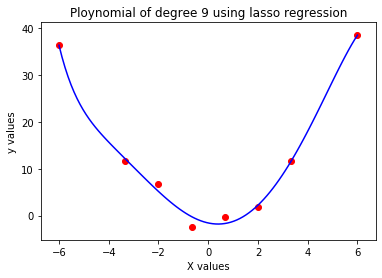

For  lasso  regression, the Mean Squared Error is: 2.046067113253279


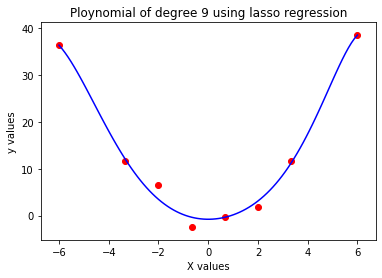

For  lasso  regression, the Mean Squared Error is: 22.07614905729678


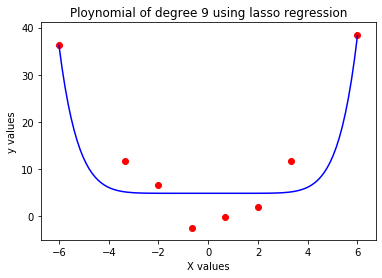

For  lasso  regression, the Mean Squared Error is: 222.2019597550688


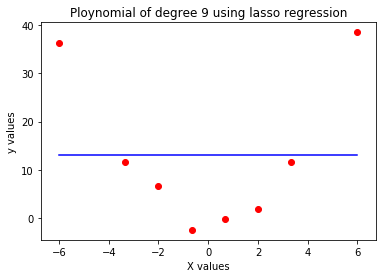

In [29]:
#Lasso Regression 

warnings.filterwarnings("ignore")

lasso_train_mse = []
lasso_coeffs = []
lasso_test_mse = []

for lamda in lamdas:
    Y_hat, mse , reg = regression(X_train_data, y_train, reg_type ="lasso", degree = 9, alpha=lamda)
    lasso_train_mse.append(mse)
    lasso_coeffs.append(reg.coef_.flatten())
    lasso_test_mse.append(mean_squared_error(y_test, reg.predict(X_test_transformed)))

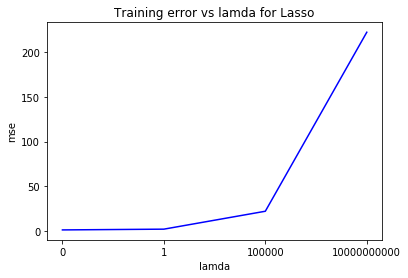

In [30]:
# Lasso Error
plt.plot(lasso_train_mse, color='blue')
plt.title("Training error vs lamda for Lasso")
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("lamda")
plt.ylabel("mse")
plt.show()

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

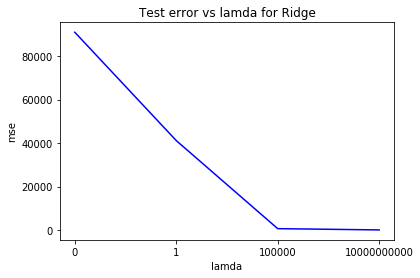

In [31]:
# Ridge Error
plt.plot(ridge_test_mse, color='blue')
plt.title("Test error vs lamda for Ridge")
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("lamda")
plt.ylabel("mse")
plt.show()

In [32]:
ridge_coeffs = np.array(ridge_coeffs).T
print("Coefficient values for different lamdas for ridge\n", ridge_coeffs)

Coefficient values for different lamdas for ridge
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.55315827e+00  7.44116435e-01 -7.44481536e-05 -8.41944511e-10]
 [ 1.60951239e-01  1.59227497e-01  2.43355499e-04  1.37336483e-08]
 [ 4.42683559e-01  1.92021948e-01 -3.10644737e-04 -4.10293246e-09]
 [ 4.86392799e-01  4.81193528e-01  1.58106688e-03  1.60946222e-07]
 [-4.54839905e-01 -2.78416132e-01 -8.54353734e-04 -1.85729179e-08]
 [-4.55959576e-02 -4.49908395e-02  9.95073541e-03  1.78835737e-06]
 [ 4.68980382e-02  2.98148846e-02  6.17908868e-05 -8.15144653e-08]
 [ 9.10977519e-04  8.98201036e-04 -2.56149945e-04  1.94013952e-05]
 [-9.62072268e-04 -6.17815448e-04 -9.43202852e-07  1.09490809e-07]]


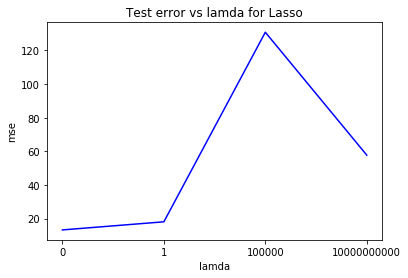

In [33]:
# Lasso Error
plt.plot(lasso_test_mse, color='blue')
plt.title("Test error vs lamda for Lasso")
plt.xticks([0, 1, 2, 3], [0, 1, 10**5, 10**10])
plt.xlabel("lamda")
plt.ylabel("mse")
plt.show()

In [34]:
lasso_coeffs = np.array(lasso_coeffs).T
print("Coefficient values for different lamdas for lasso\n", lasso_coeffs)

Coefficient values for different lamdas for lasso
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.14550678e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 1.38499965e+00  9.45360808e-01  0.00000000e+00  0.00000000e+00]
 [ 1.05999422e-01 -2.85468333e-02 -0.00000000e+00  0.00000000e+00]
 [-1.81842662e-02  1.97430837e-02  0.00000000e+00  0.00000000e+00]
 [-4.77370916e-04  1.77747810e-03  0.00000000e+00  0.00000000e+00]
 [ 1.79761406e-04 -3.71187319e-04  0.00000000e+00  0.00000000e+00]
 [-2.83996252e-05 -1.30398605e-05  0.00000000e+00  0.00000000e+00]
 [ 2.57116824e-06 -2.44338732e-06  1.93067649e-05  0.00000000e+00]
 [-3.25364936e-07 -2.90013643e-07  1.03278897e-07  0.00000000e+00]]


### Questions and Observations

- What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?

Ans: Overfitting occurs as there are too many features and not enough training examples
-  As value of lambda increases what happens to the model complexity?

Ans: Model complexity decreases

- What can be infered from the mean squared error versus lambda?

Ans: Training error decreases with decreases in lamba. However too small a lamba might result in overfitting, while too large a lamba might result in underfitting

- Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)

Ans: True. As change in lamda steps can be very small (continuous paramter), whereas we can only change one degree at a time

- Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?

Ans: Train error decreases as lamda decreases. Larger lamda means more penalization, resulting in less accurate results. As lamda increases, validation error initially decreases (due to lesser overfitting), and then increases (due to more underfitting)
